In [1]:
import pandas as pd

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
# 这句代码需要注意
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import warnings

warnings.filterwarnings("ignore")

In [2]:
# 读取数据
df=pd.read_excel("/Users/super/Desktop/github_task.xlsx")
df.head()

,期刊,目录,项目
0,《HelloGitHub》第 10 期,"['C# 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项...",12、saythanks.io：Kennethreitz 写的一个简单的网站（基于 Flas...
1,《HelloGitHub》第 10 期,"['C# 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项...",13、locust：模拟用户行为的负载测试工具，包含友好的 Web 页面，如下图：
2,《HelloGitHub》第 10 期,"['C# 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项...",14、jumpserver：Jumpserver 是一款由 Python 编写开源的跳板机（...
3,《HelloGitHub》第 11 期,"['C 项目', 'Go 项目', 'Java 项目', 'JavaScript 项目', ...",8、sh：sh 是一个成熟，用于替代 subprocess，它允许你调用任何程序，就像它是一...
4,《HelloGitHub》第 11 期,"['C 项目', 'Go 项目', 'Java 项目', 'JavaScript 项目', ...","from sh import ifconfig print ifconfig(""eth0"")"


In [3]:
# 查看信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
期刊    193 non-null object
目录    193 non-null object
项目    193 non-null object
dtypes: object(3)
memory usage: 4.6+ KB


In [4]:
# 随机挑选几条查看质量
df.sample(10)

,期刊,目录,项目
97,《HelloGitHub》第 29 期,"['C 项目', 'C++ 项目', 'Go 项目', 'Java 项目', 'JavaSc...",17、hue：开源的 Apache Hadoop UI 系统。通过使用 Hue 我们可以在浏...
104,《HelloGitHub》第 29 期,"['C 项目', 'C++ 项目', 'Go 项目', 'Java 项目', 'JavaSc...",较强的可扩展性可以满足大家折腾的欲望
149,《HelloGitHub》第 39 期,"['C# 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项...",20、psutil：一个跨平台库的进程和系统资源监控、管理库。用于查看有关正在运行的进程和系...
39,《HelloGitHub》第 17 期,"['C# 项目', 'CSS 项目', 'Go 项目', 'Java 项目', 'JavaS...",19、weibospider：分布式微博爬虫，支持快速抓取和稳定抓取两种运行模式。项目模块逻...
14,《HelloGitHub》第 13 期,"['C 项目', 'C# 项目', 'C++ 项目', 'Go 项目', 'Java 项目'...",. ├── array │ ├── circular_counter.py │ └── .....
48,《HelloGitHub》第 19 期,"['Go 项目', 'Java 项目', 'JavaScript 项目', 'Kotlin ...",主从切换后新 master 丢数据的修复
172,《HelloGitHub》第 44 期,"['C 项目', 'C++ 项目', 'Go 项目', 'Java 项目', 'JavaSc...",😅
183,《HelloGitHub》第 46 期,"['C 项目', 'C++ 项目', 'Go 项目', 'Java 项目', 'JavaSc...",22、vaex：类似 Pandas 的 Python 数据处理库，在处理大型数据集的时候表现...
49,《HelloGitHub》第 19 期,"['Go 项目', 'Java 项目', 'JavaScript 项目', 'Kotlin ...",从 binlog 生成标准SQL，带来的衍生功能
30,《HelloGitHub》第 16 期,"['C 项目', 'C# 项目', 'C++ 项目', 'Go 项目', 'Java 项目'...",✌️


In [5]:
# 创造一个1-9的string list
list1=list(map(lambda x: str(x), [x for x in range(1,10)]))
list1

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
# 剔除无效的数据
df1=df[df["项目"].apply(lambda x:x[:1] in list1)]
df1=df1[df["项目"].apply(lambda x:'、' in x[:3])]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 192
Data columns (total 3 columns):
期刊    130 non-null object
目录    130 non-null object
项目    130 non-null object
dtypes: object(3)
memory usage: 4.1+ KB


In [7]:
'无效数据量：{} 条'.format(df.shape[0]-df1.shape[0])

'无效数据量：63 条'

In [8]:
# 查看无效数据行，看看
df2=df[df["项目"].apply(lambda x:x[:1] not in list1)]
df2[["期刊","项目"]].head(10)

,期刊,项目
4,《HelloGitHub》第 11 期,"from sh import ifconfig print ifconfig(""eth0"")"
7,《HelloGitHub》第 11 期,安装：pip install mongoaudit
8,《HelloGitHub》第 11 期,运行：python mongoaudit
12,《HelloGitHub》第 13 期,"$ ngxtop running for 411 seconds, 64332 record..."
14,《HelloGitHub》第 13 期,. ├── array │ ├── circular_counter.py │ └── .....
17,《HelloGitHub》第 13 期,>>> import grequests >>> def exception_handler...
30,《HelloGitHub》第 16 期,✌️
32,《HelloGitHub》第 17 期,多进程、多线程、协程
33,《HelloGitHub》第 17 期,任务定时执行
34,《HelloGitHub》第 17 期,任务执行失败重试


In [9]:
# 查看有效数据行
df1.sample(7)

,期刊,目录,项目
3,《HelloGitHub》第 11 期,"['C 项目', 'Go 项目', 'Java 项目', 'JavaScript 项目', ...",8、sh：sh 是一个成熟，用于替代 subprocess，它允许你调用任何程序，就像它是一...
83,《HelloGitHub》第 26 期,"['C 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项目...",16、marshmallow：使用类似于 ORM 的语法，序列化、反序列化 Python 对...
186,《HelloGitHub》第 46 期,"['C 项目', 'C++ 项目', 'Go 项目', 'Java 项目', 'JavaSc...",24、KeymouseGo：Python 实现的精简绿色版按键精灵。记录用户的鼠标、键盘操作...
39,《HelloGitHub》第 17 期,"['C# 项目', 'CSS 项目', 'Go 项目', 'Java 项目', 'JavaS...",19、weibospider：分布式微博爬虫，支持快速抓取和稳定抓取两种运行模式。项目模块逻...
189,《HelloGitHub》第 47 期,"['C++ 项目', 'Go 项目', 'Java 项目', 'JavaScript 项目'...",16、activitywatch：一个记录你的时间都花在那的 Python 项目。支持 We...
159,《HelloGitHub》第 40 期,"['C 项目', 'C# 项目', 'C++ 项目', 'Go 项目', 'Java 项目'...",26、one-python-craftsman：如何编写优秀的 Python 代码？优秀的代...
190,《HelloGitHub》第 47 期,"['C++ 项目', 'Go 项目', 'Java 项目', 'JavaScript 项目'...",17、akshare：一款基于 Python 的开源金融数据接口库。提供了股票、期货、期权、...


In [10]:
# 取出具体的期数
df1["期刊2"]=df1["期刊"].apply(lambda x:x.split("第 ")[1].split(" ")[0])
df1.head()

,期刊,目录,项目,期刊2
0,《HelloGitHub》第 10 期,"['C# 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项...",12、saythanks.io：Kennethreitz 写的一个简单的网站（基于 Flas...,10
1,《HelloGitHub》第 10 期,"['C# 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项...",13、locust：模拟用户行为的负载测试工具，包含友好的 Web 页面，如下图：,10
2,《HelloGitHub》第 10 期,"['C# 项目', 'C++ 项目', 'CSS 项目', 'Go 项目', 'Java 项...",14、jumpserver：Jumpserver 是一款由 Python 编写开源的跳板机（...,10
3,《HelloGitHub》第 11 期,"['C 项目', 'Go 项目', 'Java 项目', 'JavaScript 项目', ...",8、sh：sh 是一个成熟，用于替代 subprocess，它允许你调用任何程序，就像它是一...,11
5,《HelloGitHub》第 11 期,"['C 项目', 'Go 项目', 'Java 项目', 'JavaScript 项目', ...",9、fastText.py：fastText 简而言之，就是把文档中所有词通过 lookup...,11


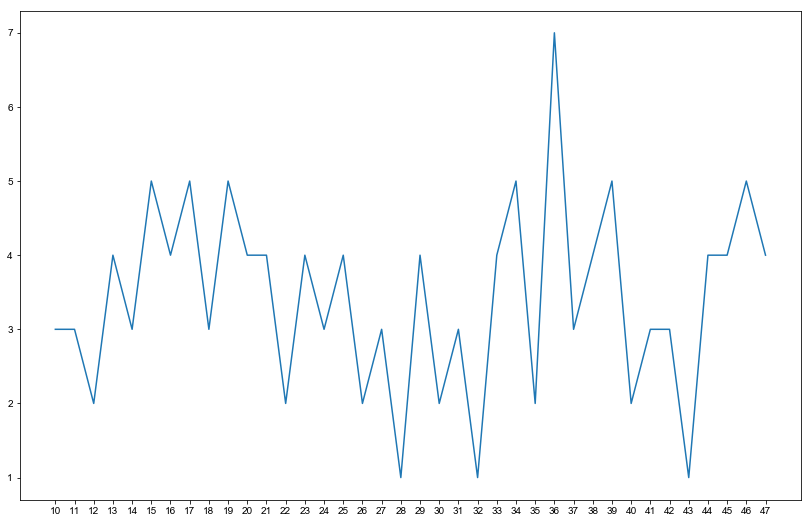

In [11]:
# 画图：每一期优质项目的分布
plt.figure(figsize=(14, 9))
plt.plot(df1.groupby("期刊2").size())

In [12]:
# 提取所有项目总和
list2=df2["目录"].apply(lambda x:eval(x)).sum()
len(list2)

649

In [13]:
from collections import Counter

In [14]:
# 求出所有项目的数量分布
count = Counter(list2)
count

Counter({'C 项目': 31,
         'Go 项目': 61,
         'Java 项目': 62,
         'JavaScript 项目': 62,
         'Python 项目': 62,
         'Swift 项目': 37,
         '其它': 62,
         '开源书籍': 41,
         'C# 项目': 29,
         'C++ 项目': 45,
         'Objective-C 项目': 31,
         '机器学习': 38,
         'CSS 项目': 19,
         'Kotlin 项目': 15,
         'PHP 项目': 21,
         'Rust 项目': 1,
         'Ruby 项目': 25,
         '教程': 7})

In [15]:
# 将字典转化为df
df_obj=pd.DataFrame(count,index=[0]).T.reset_index()
df_obj["index2"]=df_obj["index"].apply(lambda x:x.split(" ")[0])
df_obj=df_obj.sort_values(0,ascending=0)
df_obj.head()

,index,0,index2
2,Java 项目,62,Java
3,JavaScript 项目,62,JavaScript
4,Python 项目,62,Python
6,其它,62,其它
1,Go 项目,61,Go


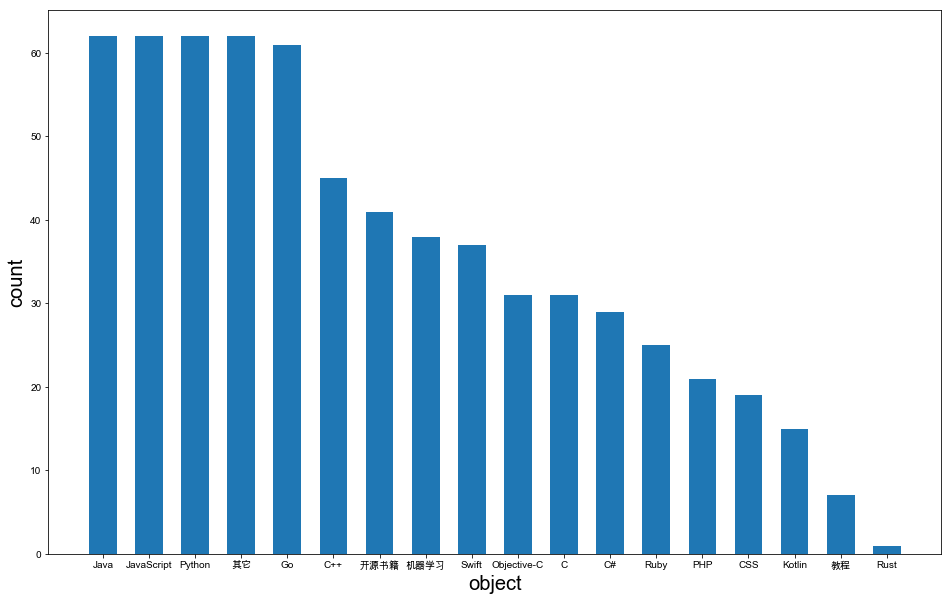

In [16]:
# 画图并保存
plt.figure(figsize=(16, 10))
plt.bar(df_obj["index2"], df_obj[0], width=0.6)

plt.xlabel('object',fontsize=20)
plt.ylabel('count',fontsize=20)

plt.savefig('/Users/super/Desktop/project.png')

In [17]:
df1.to_excel("/Users/super/Desktop/py_obj_clean.xlsx",index=False)